
# 01 Preproccesing of the dataset

The dataset used for this project is a recollection from many datasets, the repository for all the image are in the next Google dirve links:

Image Normal
  * https://drive.google.com/drive/folders/1ppm4Ggqk2_vZXaxUL_PmgwJg1C9lQFgA?usp=sharing
  
Image SARS - COV2 (COVID - 19)
  * https://drive.google.com/drive/folders/1GHjeW-LyUrxaI-7TV842kYlBU95-iO1N?usp=sharing



**Import the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

The repository is in Google Drive so we need to import all the image in this Jupyter Notebook by calling the path, with this line of code we conect jupyter notebook with Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset Exploratory

From the repository, there are **two classes** for **Normal** & **COVID**

From the repository, take one image of *Normal class* and other of *COVID class* and Let's see is the image are different

class **Normal**

Type Class of image: <class 'numpy.ndarray'>
Image RGb: (299, 299, 3)
Image Gray: (299, 299)


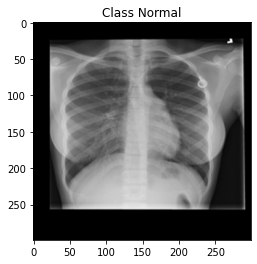

In [6]:
I_rgb = cv2.imread("Normal-1.png")
I_gray = cv2.cvtColor(I_rgb, cv2.COLOR_BGR2GRAY)   # BGR -> RGB
print("Type Class of image: {}".format(type(I_gray)))
print("Image RGb: {}".format(I_rgb.shape))
print("Image Gray: {}".format(I_gray.shape))
plt.imshow(I_gray, cmap = "gray")
plt.title("Class Normal")
plt.show()

class **COVID**

Type Class of image: <class 'numpy.ndarray'>
Image RGb: (299, 299, 3)
Image Gray: (299, 299)


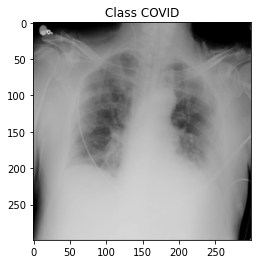

In [7]:
I_rgb = cv2.imread("COVID-1.png")
I_gray = cv2.cvtColor(I_rgb, cv2.COLOR_BGR2GRAY)   # BGR -> RGB
print("Type Class of image: {}".format(type(I_gray)))
print("Image RGb: {}".format(I_rgb.shape))
print("Image Gray: {}".format(I_gray.shape))
plt.imshow(I_gray, cmap = "gray")
plt.title("Class COVID")
plt.show()

As we can see the dimension of each image is (299, 299), all the files from the repository of the **class Normal** have the string name "Normal-1.png" and the shape of the dataset of images has the value of **10193**

Also from the repository of the **class COVID** have the string name "COVID-1.png" and the shape of the dataset of images has the values of **3616**

So we'll create an array with all the names for each image

In [ ]:
#Class normal
normal_image_files = []
for number in range(1, 10193):  #10193
  normal_image_files.append("Normal-" + str(number) + ".png")

#Class COVID
covid_image_files = []
for number in range(1, 3616): #3616
  covid_image_files.append("COVID-" + str(number) + ".png")

For each class, let's create an arrays: 

* array "X_normal"
  * Convert BGR image or colormap to grayscale
* array "y_normal"
  * this is the target array, with the value **0 : "Normal"**

In [ ]:
#Class Normal
folder_normal = r"/content/drive/MyDrive/Normal/"
X_normal = []
y_normal = []
for img_file in normal_image_files:
  I_rgb = cv2.imread(folder_normal + img_file)
  I_gray = cv2.cvtColor(I_rgb, cv2.COLOR_BGR2GRAY)   # BGR -> Gray
  X_normal.append(I_gray)
  y_normal.append(0)

X_normal_array = np.array(X_normal)
print("Dimension of normal images: {}".format(X_normal_array.shape))
print("Categorical label for normal image: {}".format(y_normal[0]))

For each class, let's create an arrays: 

* array "X_covid"
  * Convert BGR image or colormap to grayscale
* array "y_covid"
  * this is the target array, with the value **1 : "COVID"**

In [ ]:
folder_covid = r"/content/drive/MyDrive/COVID/"
X_covid = []
y_covid = []
for img_file in covid_image_files:
  I_rgb = cv2.imread(folder_covid + img_file)
  I_gray = cv2.cvtColor(I_rgb, cv2.COLOR_BGR2GRAY)   # BGR -> Gray
  X_covid.append(I_gray)
  y_covid.append(1)

X_covid_array = np.array(X_covid)
print("Dimension of normal images: {}".format(X_covid_array.shape))
print("Categorical label for normal image: {}".format(y_covid[0]))

Once we have all the images as an numpy array for each class, let's **merge** the two dataset.

With this it's only one dataset 

In [ ]:
X = np.concatenate(X_normal, X_covid)
y = np.concatenate(y_normal, y_covid)
X_array = np.array(X)
y_array = np.array(y)

X_array.shape, y_array.shape

**Save** the dataset in an array (npy). The idea to sabe all the images in an array is to avoid import all the images from Google drive and repeat all the process again

In [ ]:
np.save("Dataset_image.npy", X_array)
np.save("Label_image.npy", y_array)